In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading data
df=pd.read_csv(r"C:\Users\rajen\Desktop\Shubhankar\data _to_pratice\AnaemiaPrediction\file_.csv")
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.97,28.36,26.41,5.15,Yes
1,2,F,44.01,29.22,27.33,7.97,Yes
2,3,F,47.77,27.73,24.61,9.14,Yes
3,4,F,45.96,30.69,25.19,4.00,Yes
4,5,M,46.91,31.26,22.21,9.90,Yes


In [3]:
df.shape

(500, 7)

There are only 500 rows and 7 columns in our data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        500 non-null    int64  
 1   Sex           500 non-null    object 
 2   %Red Pixel    500 non-null    float64
 3   %Green pixel  500 non-null    float64
 4   %Blue pixel   500 non-null    float64
 5   Hb            500 non-null    float64
 6   Anaemic       500 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 27.5+ KB


In [5]:
# checking missing values
df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

No null or missing values in data.

In [6]:
# checking duplicate data
df.duplicated().sum()

0

No duplicate values are present in data

In [7]:
# statistical summary
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,44.913580,29.349720,25.570440,10.893100
std,144.481833,2.950017,1.844623,2.215913,3.040943
min,1.000000,36.800000,24.150000,17.950000,4.000000
25%,125.750000,43.000000,28.130000,24.550000,8.920000
50%,250.500000,44.555000,29.480000,25.935000,9.950000
75%,375.250000,46.465000,30.692500,27.002500,13.330000
max,500.000000,56.850000,33.600000,31.300000,18.550000


### EDA

In [8]:
df["Sex"].unique()

array(['M', 'F', 'M ', 'F '], dtype=object)

Here we have only two categories Male and Female code as M and F, So lets fix it

In [9]:
df["Sex"].replace(["M ", "F "],["M","F"] ,inplace=True)

In [10]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

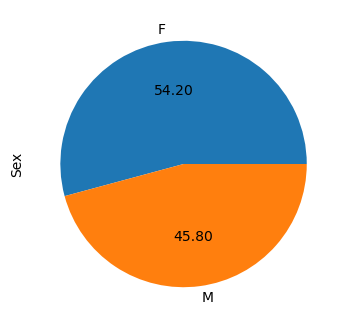

In [11]:
plt.figure(figsize=(4,4))
df["Sex"].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

Yes    250
No     250
Name: Anaemic, dtype: int64

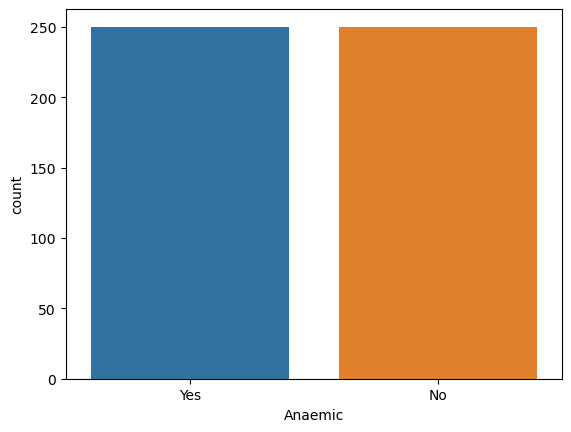

In [12]:
# count of number of Anaemic positive and negative people
sns.countplot(x="Anaemic" ,data=df)
df["Anaemic"].value_counts()

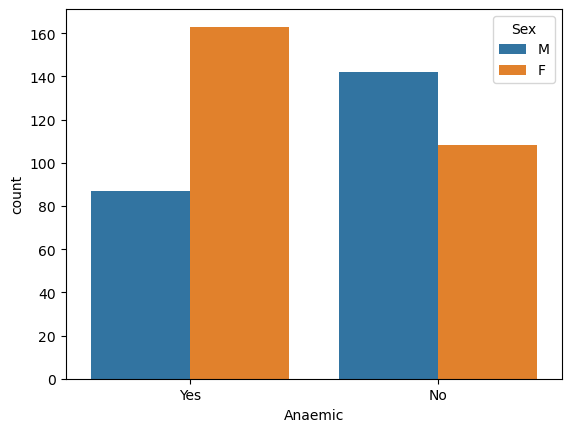

In [13]:
# count of number of Anaemic positive and negative people with respect to gender
sns.countplot(x="Anaemic" ,data=df, hue="Sex")
plt.show()

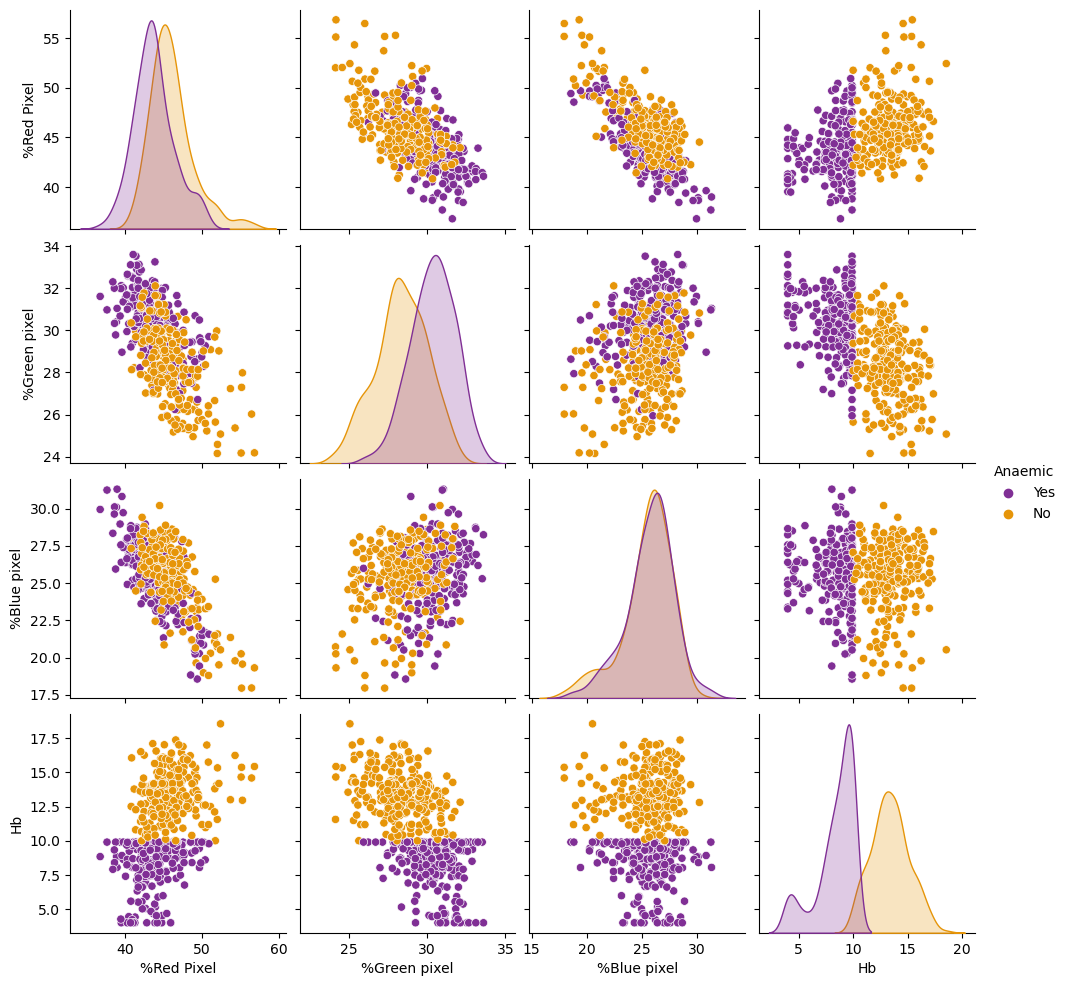

In [14]:
#plotting pair plot
sns.pairplot(data=df[['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb','Anaemic']],hue="Anaemic",
             palette="CMRmap")
plt.show()

Pepople with high "Hb" level that is more than 10 has high chances of being Anaemic positive.

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')

# transforming the 'Sex' and 'Anaemic' columns
encoded_data = ohe.fit_transform(df[['Sex', 'Anaemic']])

encoded_data=pd.DataFrame(encoded_data, columns=["Sex","Anaemic"])
encoded_data

,Sex,Anaemic
0,1.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,1.0
...,...,...
495,0.0,0.0
496,0.0,0.0
497,0.0,0.0
498,0.0,0.0


In [16]:
# Combine the encoded data with the original DataFrame, excluding the original columns
df_encoded = pd.concat([df.drop(["Number","Sex", "Anaemic"], axis=1), encoded_data], axis=1)
df_encoded

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Sex,Anaemic
0,43.97,28.36,26.41,5.15,1.0,1.0
1,44.01,29.22,27.33,7.97,0.0,1.0
2,47.77,27.73,24.61,9.14,0.0,1.0
3,45.96,30.69,25.19,4.00,0.0,1.0
4,46.91,31.26,22.21,9.90,1.0,1.0
...,...,...,...,...,...,...
495,44.87,27.52,26.57,14.19,0.0,0.0
496,44.85,28.20,24.44,11.94,0.0,0.0
497,42.27,31.57,27.37,11.69,0.0,0.0
498,43.22,29.57,26.45,13.53,0.0,0.0


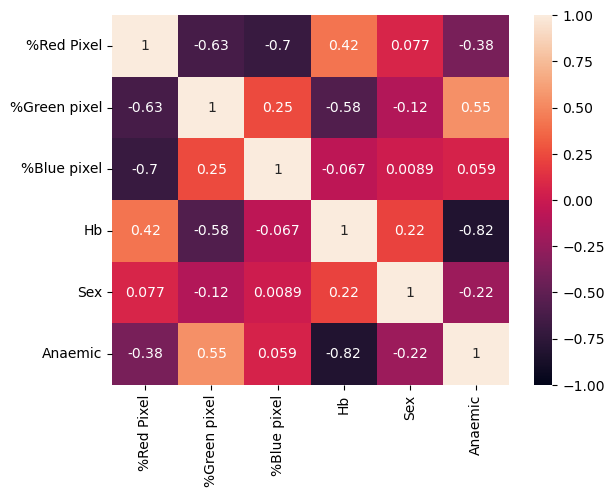

In [17]:
# checking correlation
sns.heatmap(df_encoded.corr(), annot=True, vmax=1.0, vmin=-1.0)
plt.show()

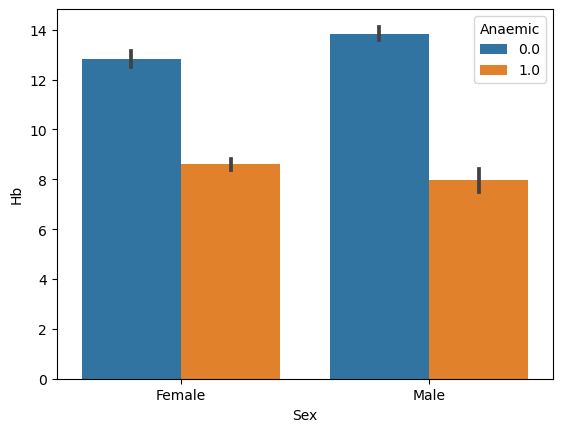

In [18]:
sns.barplot(data= df_encoded, x="Sex",y="Hb", hue="Anaemic")
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

- Both male and female with low Hb on an average of 8 has less chances of being Anaemic positive.

In [19]:
# feature selection
X=df_encoded[["%Red Pixel","%Green pixel","%Blue pixel","Hb"]]
X

,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,43.97,28.36,26.41,5.15
1,44.01,29.22,27.33,7.97
2,47.77,27.73,24.61,9.14
3,45.96,30.69,25.19,4.00
4,46.91,31.26,22.21,9.90
...,...,...,...,...
495,44.87,27.52,26.57,14.19
496,44.85,28.20,24.44,11.94
497,42.27,31.57,27.37,11.69
498,43.22,29.57,26.45,13.53


In [20]:
# target variable
y=df_encoded["Anaemic"]
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: Anaemic, Length: 500, dtype: float64

In [21]:
# performing train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 4)
(150, 4)
(350,)
(150,)


In [22]:
# Making dictionary of models for there corresponding accuracy, precision, recall and F1 scores
accuracy_score_dict = dict()
precision_score_dict = dict()
recall_score_dict = dict()
f1_score_dict = dict()

In [23]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# GaussianNB

In [24]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB")
print("accuracy_score: ", accuracy_score(y_test, y_pred1))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred1))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred1))
print("-----"*20)
print("recall: \n", recall_score(y_test, y_pred1))
print("-----"*20)
print("F1_score: \n", f1_score(y_test, y_pred1))

GaussianNB
accuracy_score:  0.9466666666666667
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[75  5]
 [ 3 67]]
----------------------------------------------------------------------------------------------------
precision_score:  0.9305555555555556
----------------------------------------------------------------------------------------------------
recall: 
 0.9571428571428572
----------------------------------------------------------------------------------------------------
F1_score: 
 0.943661971830986


In [25]:
accuracy_score_dict["GaussianNB"] = accuracy_score(y_test, y_pred1)
precision_score_dict["GaussianNB"] = precision_score(y_test, y_pred1)
recall_score_dict["GaussianNB"] = recall_score(y_test, y_pred1)
f1_score_dict["GaussianNB"] = f1_score(y_test, y_pred1)

# MultinomialNB

In [26]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("MultinomialNB")
print("accuracy_score: ", accuracy_score(y_test, y_pred2))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred2))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred2))
print("-----"*20)
print("recall: \n", recall_score(y_test, y_pred2))
print("-----"*20)
print("F1_score: \n", f1_score(y_test, y_pred2))

MultinomialNB
accuracy_score:  0.9533333333333334
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[75  5]
 [ 2 68]]
----------------------------------------------------------------------------------------------------
precision_score:  0.9315068493150684
----------------------------------------------------------------------------------------------------
recall: 
 0.9714285714285714
----------------------------------------------------------------------------------------------------
F1_score: 
 0.9510489510489512


In [27]:
accuracy_score_dict["MultinomialNB"] = accuracy_score(y_test, y_pred2)
precision_score_dict["MultinomialNB"] = precision_score(y_test, y_pred2)
recall_score_dict["MultinomialNB"] = recall_score(y_test, y_pred2)
f1_score_dict["MultinomialNB"] = f1_score(y_test, y_pred2)

# BernoulliNB

In [28]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("BernoulliNB")
print("accuracy_score: ", accuracy_score(y_test, y_pred3))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred3))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred3))
print("-----"*20)
print("recall: \n", recall_score(y_test, y_pred3))
print("-----"*20)
print("F1_score: \n", f1_score(y_test, y_pred3))

BernoulliNB
accuracy_score:  0.4666666666666667
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[ 0 80]
 [ 0 70]]
----------------------------------------------------------------------------------------------------
precision_score:  0.4666666666666667
----------------------------------------------------------------------------------------------------
recall: 
 1.0
----------------------------------------------------------------------------------------------------
F1_score: 
 0.6363636363636364


In [29]:
accuracy_score_dict["BernoulliNB"] = accuracy_score(y_test, y_pred3)
precision_score_dict["BernoulliNB"] = precision_score(y_test, y_pred3)
recall_score_dict["BernoulliNB"] = recall_score(y_test, y_pred3)
f1_score_dict["BernoulliNB"] = f1_score(y_test, y_pred3)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [31]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print("accuracy_score: ", accuracy_score(y_test, y_pred_lr))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_lr))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred_lr))
print("-----"*20)
print("recall: \n", recall_score(y_test, y_pred_lr))
print("-----"*20)
print("F1_score: \n", f1_score(y_test, y_pred_lr))

Logistic Regression
accuracy_score:  0.98
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[77  3]
 [ 0 70]]
----------------------------------------------------------------------------------------------------
precision_score:  0.958904109589041
----------------------------------------------------------------------------------------------------
recall: 
 1.0
----------------------------------------------------------------------------------------------------
F1_score: 
 0.9790209790209791


In [32]:
accuracy_score_dict["Logistic Regression"] = accuracy_score(y_test, y_pred_lr)
precision_score_dict["Logistic Regression"] = precision_score(y_test, y_pred_lr)
recall_score_dict["Logistic Regression"] = recall_score(y_test, y_pred_lr)
f1_score_dict["Logistic Regression"] = f1_score(y_test, y_pred_lr)

# DecisionTree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [34]:
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("DecisionTree")
print("accuracy_score: ", accuracy_score(y_test, y_pred_dt))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred_dt))
print("-----"*20)
print("recall: \n", recall_score(y_test, y_pred_dt))
print("-----"*20)
print("F1_score: \n", f1_score(y_test, y_pred_dt))

DecisionTree
accuracy_score:  1.0
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[80  0]
 [ 0 70]]
----------------------------------------------------------------------------------------------------
precision_score:  1.0
----------------------------------------------------------------------------------------------------
recall: 
 1.0
----------------------------------------------------------------------------------------------------
F1_score: 
 1.0


In [35]:
accuracy_score_dict["DecisionTree"] = accuracy_score(y_test, y_pred_dt)
precision_score_dict["DecisionTree"] = precision_score(y_test, y_pred_dt)
recall_score_dict["DecisionTree"] = recall_score(y_test, y_pred_dt)
f1_score_dict["DecisionTree"] = f1_score(y_test, y_pred_dt)

# KNeighborsClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [37]:
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)
print("KNeighborsClassifier")
print("accuracy_score: ", accuracy_score(y_test, y_pred_knc))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_knc))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred_knc))
print("-----"*20)
print("recall: \n", recall_score(y_test, y_pred_knc))
print("-----"*20)
print("F1_score: \n", f1_score(y_test, y_pred_knc))

KNeighborsClassifier
accuracy_score:  0.94
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[72  8]
 [ 1 69]]
----------------------------------------------------------------------------------------------------
precision_score:  0.8961038961038961
----------------------------------------------------------------------------------------------------
recall: 
 0.9857142857142858
----------------------------------------------------------------------------------------------------
F1_score: 
 0.9387755102040817


In [38]:
accuracy_score_dict["KNeighborsClassifier"] = accuracy_score(y_test, y_pred_knc)
precision_score_dict["KNeighborsClassifier"] = precision_score(y_test, y_pred_knc)
recall_score_dict["KNeighborsClassifier"] = recall_score(y_test, y_pred_knc)
f1_score_dict["KNeighborsClassifier"] = f1_score(y_test, y_pred_knc)

# RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [40]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("RandomForestClassifier")
print("accuracy_score: ", accuracy_score(y_test, y_pred_rfc))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_rfc))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred_rfc))
print("-----"*20)
print("recall: \n", recall_score(y_test, y_pred_rfc))
print("-----"*20)
print("F1_score: \n", f1_score(y_test, y_pred_rfc))

RandomForestClassifier
accuracy_score:  0.9866666666666667
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[78  2]
 [ 0 70]]
----------------------------------------------------------------------------------------------------
precision_score:  0.9722222222222222
----------------------------------------------------------------------------------------------------
recall: 
 1.0
----------------------------------------------------------------------------------------------------
F1_score: 
 0.9859154929577464


In [41]:
accuracy_score_dict["RandomForestClassifier"] = accuracy_score(y_test, y_pred_rfc)
precision_score_dict["RandomForestClassifier"] = precision_score(y_test, y_pred_rfc)
recall_score_dict["RandomForestClassifier"] = recall_score(y_test, y_pred_rfc)
f1_score_dict["RandomForestClassifier"] = f1_score(y_test, y_pred_rfc)

# SVM

In [42]:
from sklearn import svm
svm_model = svm.SVC(kernel="linear")

In [43]:
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM")
print("accuracy_score: ", accuracy_score(y_test, y_pred_svm))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_svm))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred_svm))
print("-----"*20)
print("recall: \n", recall_score(y_test, y_pred_svm))
print("-----"*20)
print("F1_score: \n", f1_score(y_test, y_pred_svm))

SVM
accuracy_score:  0.98
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[77  3]
 [ 0 70]]
----------------------------------------------------------------------------------------------------
precision_score:  0.958904109589041
----------------------------------------------------------------------------------------------------
recall: 
 1.0
----------------------------------------------------------------------------------------------------
F1_score: 
 0.9790209790209791


In [44]:
accuracy_score_dict["SVM"] = accuracy_score(y_test, y_pred_svm)
precision_score_dict["SVM"] = precision_score(y_test, y_pred_svm)
recall_score_dict["SVM"] = recall_score(y_test, y_pred_svm)
f1_score_dict["SVM"] = f1_score(y_test, y_pred_svm)

In [45]:
for i in accuracy_score_dict:
    print(i, ": ",round(accuracy_score_dict[i],3))

GaussianNB :  0.947
MultinomialNB :  0.953
BernoulliNB :  0.467
Logistic Regression :  0.98
DecisionTree :  1.0
KNeighborsClassifier :  0.94
RandomForestClassifier :  0.987
SVM :  0.98


In [52]:
# Creating Datafram
accuracy_score_df = pd.DataFrame(list(accuracy_score_dict.items()), columns=["Classifier", "Accuracy"])
accuracy_score_df

,Classifier,f1_score
0,GaussianNB,0.943662
1,MultinomialNB,0.951049
2,BernoulliNB,0.636364
3,Logistic Regression,0.979021
4,DecisionTree,1.000000
5,KNeighborsClassifier,0.938776
6,RandomForestClassifier,0.985915
7,SVM,0.979021


In [47]:
# Creating Datafram
precision_score_df = pd.DataFrame(list(precision_score_dict.items()), columns=["Classifier", "Precision"])
precision_score_df

,Classifier,Precision
0,GaussianNB,0.930556
1,MultinomialNB,0.931507
2,BernoulliNB,0.466667
3,Logistic Regression,0.958904
4,DecisionTree,1.000000
5,KNeighborsClassifier,0.896104
6,RandomForestClassifier,0.972222
7,SVM,0.958904


In [48]:
# Creating Datafram
recall_score_df = pd.DataFrame(list(recall_score_dict.items()), columns=["Classifier", "Recall"])
recall_score_df

,Classifier,Recall
0,GaussianNB,0.957143
1,MultinomialNB,0.971429
2,BernoulliNB,1.000000
3,Logistic Regression,1.000000
4,DecisionTree,1.000000
5,KNeighborsClassifier,0.985714
6,RandomForestClassifier,1.000000
7,SVM,1.000000


In [49]:
# Creating Datafram
f1_score_df = pd.DataFrame(list(f1_score_dict.items()), columns=["Classifier", "f1_score"])
f1_score_df

,Classifier,f1_score
0,GaussianNB,0.943662
1,MultinomialNB,0.951049
2,BernoulliNB,0.636364
3,Logistic Regression,0.979021
4,DecisionTree,1.000000
5,KNeighborsClassifier,0.938776
6,RandomForestClassifier,0.985915
7,SVM,0.979021


In [50]:
Matrix_df = pd.merge(pd.merge(accuracy_score_df, precision_score_df), recall_score_df, on="Classifier")
Matrix_df=pd.merge(Matrix_df, f1_score_df)
Matrix_df

,Classifier,Accuracy,Precision,Recall,f1_score
0,GaussianNB,0.946667,0.930556,0.957143,0.943662
1,MultinomialNB,0.953333,0.931507,0.971429,0.951049
2,BernoulliNB,0.466667,0.466667,1.000000,0.636364
3,Logistic Regression,0.980000,0.958904,1.000000,0.979021
4,DecisionTree,1.000000,1.000000,1.000000,1.000000
5,KNeighborsClassifier,0.940000,0.896104,0.985714,0.938776
6,RandomForestClassifier,0.986667,0.972222,1.000000,0.985915
7,SVM,0.980000,0.958904,1.000000,0.979021


In [51]:
Matrix_df.sort_values(by=["Accuracy","Recall"], ascending=False, inplace=True)
Matrix_df.reset_index(drop=True, inplace=True)
Matrix_df

,Classifier,Accuracy,Precision,Recall,f1_score
0,DecisionTree,1.000000,1.000000,1.000000,1.000000
1,RandomForestClassifier,0.986667,0.972222,1.000000,0.985915
2,Logistic Regression,0.980000,0.958904,1.000000,0.979021
3,SVM,0.980000,0.958904,1.000000,0.979021
4,MultinomialNB,0.953333,0.931507,0.971429,0.951049
5,GaussianNB,0.946667,0.930556,0.957143,0.943662
6,KNeighborsClassifier,0.940000,0.896104,0.985714,0.938776
7,BernoulliNB,0.466667,0.466667,1.000000,0.636364


- As this dataset is balanced so accuracy would be enough to see performance of model but still lets consider recall also.
- DecisionTree performs best out of all the models as accuracy and recall is high, followed by RandomForestClassifier.
- Performace of Svm and Logistic Regression same.
- We should use DecisionTree for deployment.